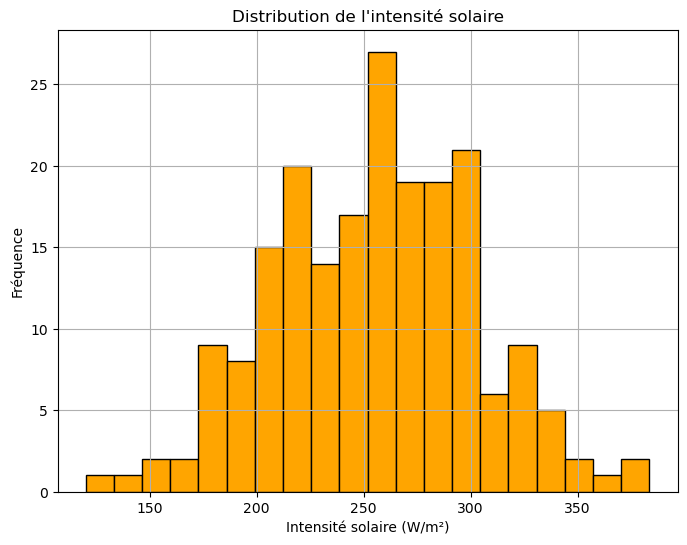

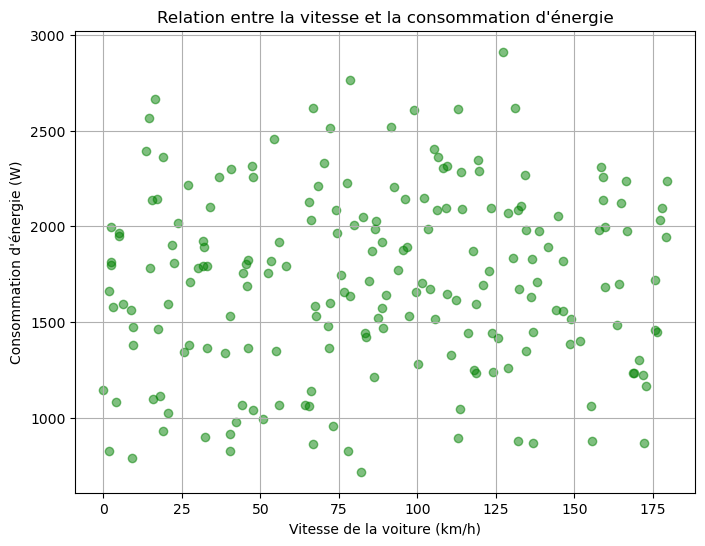

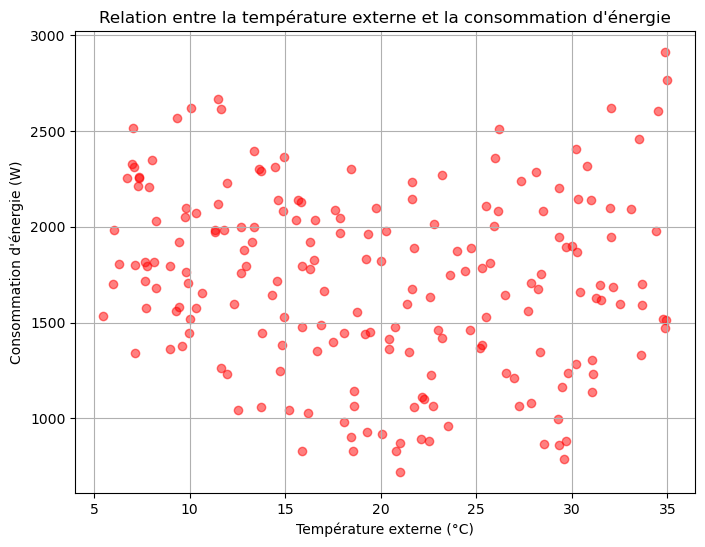

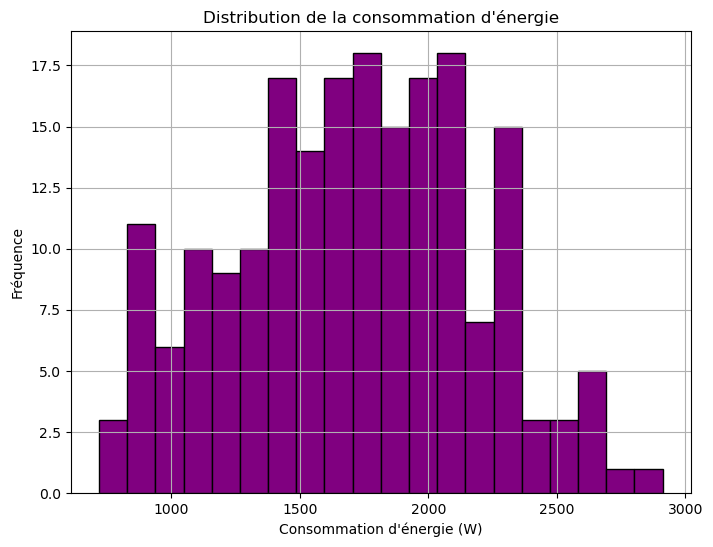

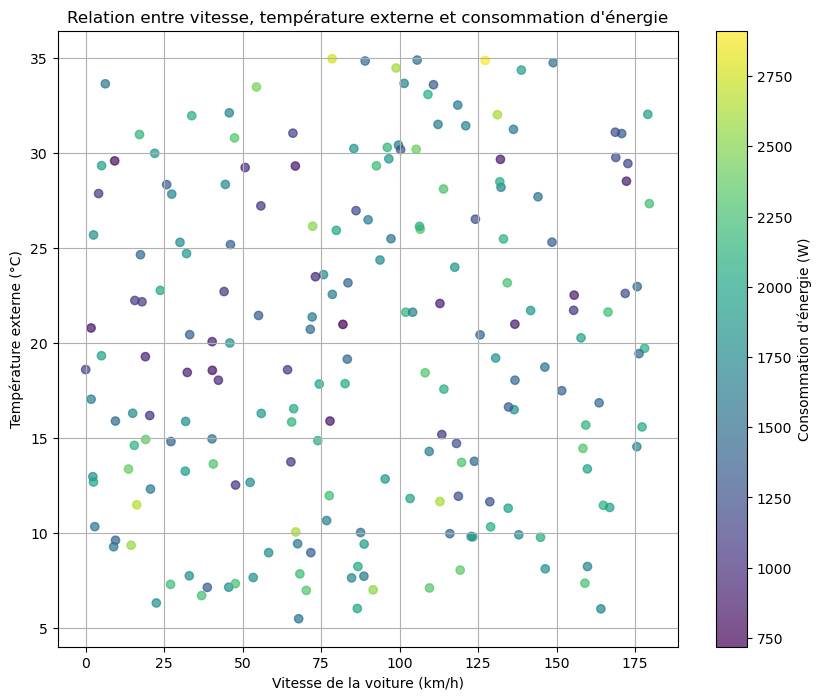

In [48]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Données fournies dans masen
GHI = 1979  # Global Horizontal Irradiance en kWh/m²
GTI = 2231  # Global Tilted Irradiance en kWh/m²

# Conversion de GTI en W/m² (intensité solaire)
intensite_solaire_gti = (GTI * 1000) / 8760  # Conversion de kWh/m² à W/m²

# Créer un dataset pour simuler la consommation d'énergie d'une Toyota C-HR
num_rows = 200  # Nombre de lignes dans le dataset

# Générer des données aléatoires pour chaque colonne
data = {
    'debit d\'air': np.round(np.random.uniform(200, 600, num_rows), 2),  # Débit d'air en m³/h
    'temperature intern': np.round(np.random.uniform(15, 30, num_rows), 2),  # Température interne en °C
    'nomber de pasagere': np.random.randint(1, 6, num_rows),  # Nombre de passagers (1 à 5)
    'temperature conssigne': np.round(np.random.uniform(18, 25, num_rows), 2),  # Température de consigne en °C
    'intensite solaire': np.round(np.random.normal(intensite_solaire_gti, 50, num_rows), 2),  # Intensité solaire en W/m²
    'puisance d\'equipement': np.round(np.random.uniform(500, 2000, num_rows), 2),  # Puissance des équipements en W
    'mass d\'air': np.round(np.random.uniform(1, 5, num_rows), 2),  # Masse d'air en kg
    'vitesse de voiture': np.round(np.random.uniform(0, 180, num_rows), 2),  # Vitesse de la voiture en km/h
    'temperature externe': np.round(np.random.uniform(5, 35, num_rows), 2)  # Température externe en °C
}

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Ajouter une colonne pour la consommation d'énergie
df['difference_temperature'] = abs(df['temperature intern'] - df['temperature externe']).round(2)
df['energy_consumption'] = (
    df['difference_temperature'] * df['debit d\'air'] * 0.1 +  # Effet de la climatisation
    df['puisance d\'equipement'] +  # Effet des équipements
    df['vitesse de voiture'] * 0.5 +  # Effet de la vitesse
    df['intensite solaire'] * 0.2  # Effet de l'intensité solaire
).round(2)

# Sauvegarder le dataset dans un fichier CSV
df.to_csv('toyota_chr_energy_consumption.csv', index=False)

# Charger le dataset depuis le fichier CSV (pour démonstration)
df = pd.read_csv('toyota_chr_energy_consumption.csv')


# Visualisation des données avec matplotlib

# 1. Distribution de l'intensité solaire
plt.figure(figsize=(8, 6))
plt.hist(df['intensite solaire'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution de l\'intensité solaire')
plt.xlabel('Intensité solaire (W/m²)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# 2. Relation entre la vitesse de la voiture et la consommation d'énergie
plt.figure(figsize=(8, 6))
plt.scatter(df['vitesse de voiture'], df['energy_consumption'], color='green', alpha=0.5)
plt.title('Relation entre la vitesse et la consommation d\'énergie')
plt.xlabel('Vitesse de la voiture (km/h)')
plt.ylabel('Consommation d\'énergie (W)')
plt.grid(True)
plt.show()

# 3. Relation entre la température externe et la consommation d'énergie
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature externe'], df['energy_consumption'], color='red', alpha=0.5)
plt.title('Relation entre la température externe et la consommation d\'énergie')
plt.xlabel('Température externe (°C)')
plt.ylabel('Consommation d\'énergie (W)')
plt.grid(True)
plt.show()

# 4. Distribution de la consommation d'énergie
plt.figure(figsize=(8, 6))
plt.hist(df['energy_consumption'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution de la consommation d\'énergie')
plt.xlabel('Consommation d\'énergie (W)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# 5. Relation multidimensionnelle (vitesse, température externe, consommation d'énergie)
plt.figure(figsize=(10, 8))
plt.scatter(df['vitesse de voiture'], df['temperature externe'], c=df['energy_consumption'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Consommation d\'énergie (W)')
plt.title('Relation entre vitesse, température externe et consommation d\'énergie')
plt.xlabel('Vitesse de la voiture (km/h)')
plt.ylabel('Température externe (°C)')
plt.grid(True)
plt.show()